# Alzheimer's disease diagnosis prediction based on patient data

Data source:
https://www.kaggle.com/code/rubenc35/alzheimer-predict

## Import packages and data

Import the needed packages:

In [2]:
 #import packages

import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns 

Import the data:

In [3]:
df = pd.read_csv('../data/alzheimer.csv')

Explore the dataframe:

In [5]:
df.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


Group is the target value to predict

- Group --> Demented/Nondemented
- Age --> Age
- EDUC --> Years of Education
- SES --> Socioeconomic Status / 1-5
- MMSE --> Mini Mental State Examination
- CDR --> Clinical Dementia Rating
- eTIV --> Estimated total intracranial volume
- nWBV --> Normalize Whole Brain Volume
- ASF --> Atlas Scaling Factor

In [7]:
df.rename(columns = {
    'M/F':'Gender',
    'EDUC':'Years of Education',
    'SES': 'Socioeconomic Status', 
    'MMSE': 'Mini Mental State Examination', 
    'CDR': 'Clinical Dementia Rating', 
    'eTIV': 'Estimated total intracranial volume', 
    'nWBV': 'Normalize Whole Brain Volume', 
    'ASF': 'Atlas Scaling Factor'}, inplace = True)

In [8]:
#This will be our y to predict 
#Coverted is an ambiguous class and will be eliminated

df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [9]:
#Check for NaN values 

df.isnull().sum()

Group                                   0
Gender                                  0
Age                                     0
Years of Education                      0
Socioeconomic Status                   19
Mini Mental State Examination           2
Clinical Dementia Rating                0
Estimated total intracranial volume     0
Normalize Whole Brain Volume            0
Atlas Scaling Factor                    0
dtype: int64

In [10]:
#Check the column formating 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Group                                373 non-null    object 
 1   Gender                               373 non-null    object 
 2   Age                                  373 non-null    int64  
 3   Years of Education                   373 non-null    int64  
 4   Socioeconomic Status                 354 non-null    float64
 5   Mini Mental State Examination        371 non-null    float64
 6   Clinical Dementia Rating             373 non-null    float64
 7   Estimated total intracranial volume  373 non-null    int64  
 8   Normalize Whole Brain Volume         373 non-null    float64
 9   Atlas Scaling Factor                 373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


## Explore data

<AxesSubplot:xlabel='Gender', ylabel='count'>

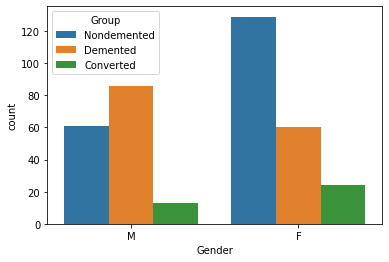

In [11]:
#Comparison between Male and Female patients

sns.countplot(data=df, x='Gender', hue='Group')

<AxesSubplot:xlabel='Age', ylabel='Count'>

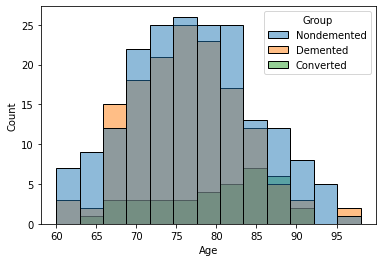

In [12]:
#Comparisson between different age groups and diagnosis

sns.histplot(data=df, x='Age', hue='Group')

<AxesSubplot:xlabel='Years of Education', ylabel='Count'>

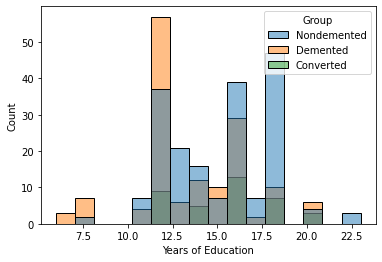

In [13]:
#Comparison between patient subgroups depending on the years of education

sns.histplot(data=df, x='Years of Education', hue='Group')

<AxesSubplot:xlabel='Socioeconomic Status', ylabel='count'>

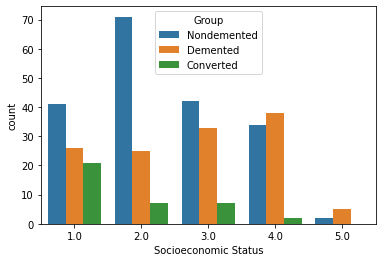

In [14]:
#Distribution of diagnosis subropups across the socioeconomics status groups

sns.countplot(data=df, x='Socioeconomic Status', hue='Group')

<AxesSubplot:xlabel='Mini Mental State Examination', ylabel='Count'>

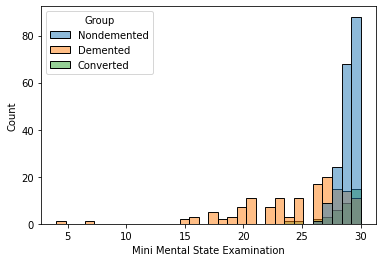

In [15]:
#Correlation between the Mini Mental State Examination and the diagnosis

sns.histplot(data=df, x='Mini Mental State Examination', hue='Group')

<AxesSubplot:xlabel='Clinical Dementia Rating', ylabel='count'>

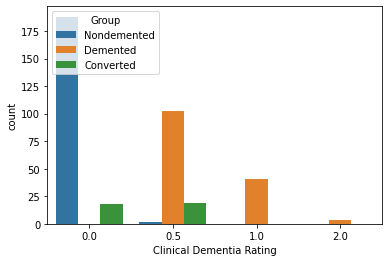

In [16]:
#Clinical dementia rating is provided to patients after diagnosis, hence it is strongly correlated with the value we want to predict

sns.countplot(data=df, x='Clinical Dementia Rating', hue='Group')

<AxesSubplot:xlabel='Estimated total intracranial volume', ylabel='Count'>

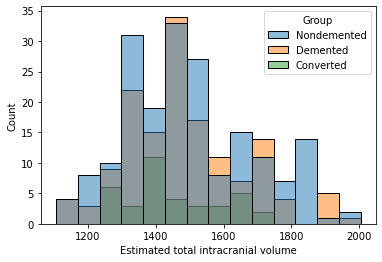

In [17]:
#Correlation between estimated total intracranial volume and diagnosis subgroups 

sns.histplot(data=df, x='Estimated total intracranial volume', hue='Group')

<AxesSubplot:xlabel='Normalize Whole Brain Volume', ylabel='Count'>

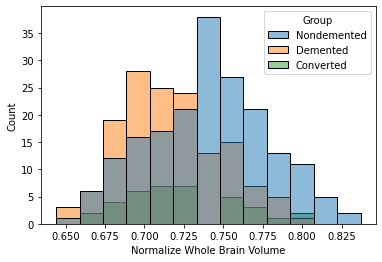

In [18]:
#Correlation between normalize whole brain volume and diagnosis subgroups 

sns.histplot(data=df, x='Normalize Whole Brain Volume', hue='Group')

<AxesSubplot:xlabel='Atlas Scaling Factor', ylabel='Count'>

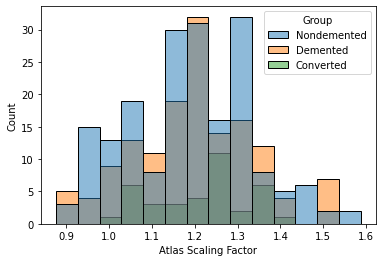

In [19]:
#Correlation between atlas scaling factor and diagnosis subgroups 

sns.histplot(data=df, x='Atlas Scaling Factor', hue='Group')

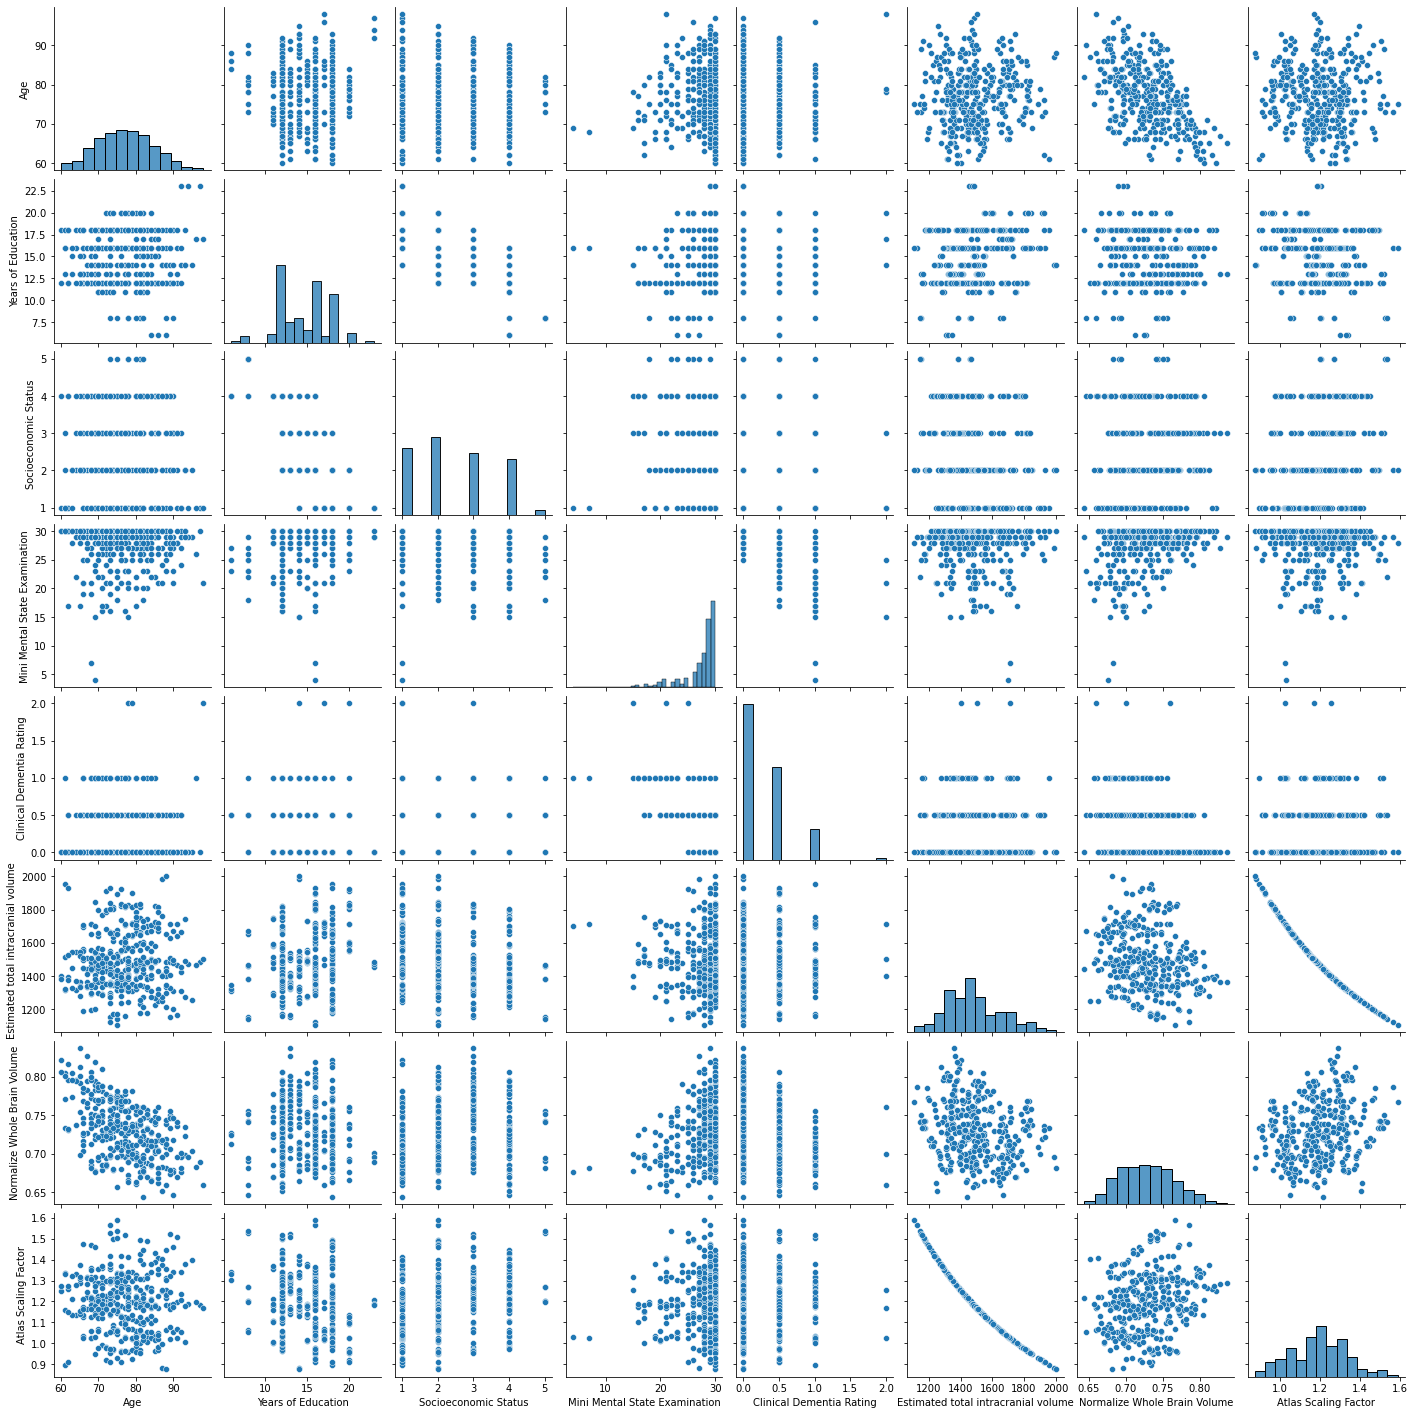

In [20]:
#Correlation between the features

sns.pairplot(df)

<AxesSubplot:>

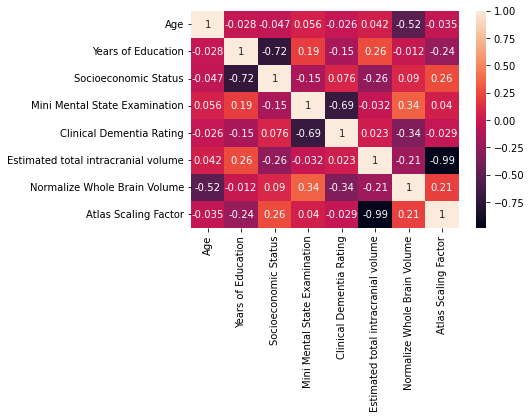

In [22]:
#Correlation between the features as heatmap 

sns.heatmap(df.corr(), annot=True)

Correlation observed between:
* estimated total intracarnical volume and atlas scaling factor;
* clinical dementia raiting and mini mental state examination;
* socioeconomic status and years of education.

# Preprocessing

## Remove missing parameters 
(1) By dropping converted 
(2) filling nan values

In [23]:
#Remove converted from the dataset 

df2 = df[df['Group'].isin(['Demented', 'Nondemented'])].reset_index()
df2

,index,Group,Gender,Age,Years of Education,Socioeconomic Status,Mini Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume,Normalize Whole Brain Volume,Atlas Scaling Factor
0,0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
331,368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
332,369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
333,370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
334,371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [24]:
df2.drop(columns=['index'],inplace=True)

In [25]:
df2.head(5)

,Group,Gender,Age,Years of Education,Socioeconomic Status,Mini Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume,Normalize Whole Brain Volume,Atlas Scaling Factor
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [26]:
df2.isnull().sum()

Group                                   0
Gender                                  0
Age                                     0
Years of Education                      0
Socioeconomic Status                   19
Mini Mental State Examination           2
Clinical Dementia Rating                0
Estimated total intracranial volume     0
Normalize Whole Brain Volume            0
Atlas Scaling Factor                    0
dtype: int64

In [27]:
mean_SES=df2.groupby('Group')["Socioeconomic Status"].mean()
mean_SES

Group
Demented       2.771654
Nondemented    2.394737
Name: Socioeconomic Status, dtype: float64

In [28]:
mode_SES=df2.groupby('Group')["Socioeconomic Status"].agg(pd.Series.mode)
mode_SES

Group
Demented       4.0
Nondemented    2.0
Name: Socioeconomic Status, dtype: float64

In [29]:
df3 = df2[df2['Socioeconomic Status'].isnull()]
df3

,Group,Gender,Age,Years of Education,Socioeconomic Status,Mini Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume,Normalize Whole Brain Volume,Atlas Scaling Factor
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,Demented,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,Demented,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,Demented,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
120,Demented,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
121,Demented,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
191,Demented,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
192,Demented,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [30]:
#Only the demeneted patients are missing SES vaue, and the mean value for demented subgroup is filled in places, where the value is missing

df2['SES_filled']= df2['Socioeconomic Status'].fillna(mode_SES[0])

In [31]:
mean_mmse=round(df2.groupby('Group')["Mini Mental State Examination"].mean(),0)
mean_mmse

Group
Demented       25.0
Nondemented    29.0
Name: Mini Mental State Examination, dtype: float64

In [32]:
df2['MMSE_filled']= df2['Mini Mental State Examination'].fillna(mean_mmse[0])

In [33]:
df2.isnull().sum()

Group                                   0
Gender                                  0
Age                                     0
Years of Education                      0
Socioeconomic Status                   19
Mini Mental State Examination           2
Clinical Dementia Rating                0
Estimated total intracranial volume     0
Normalize Whole Brain Volume            0
Atlas Scaling Factor                    0
SES_filled                              0
MMSE_filled                             0
dtype: int64

In [34]:
df2.head(5)

,Group,Gender,Age,Years of Education,Socioeconomic Status,Mini Mental State Examination,Clinical Dementia Rating,Estimated total intracranial volume,Normalize Whole Brain Volume,Atlas Scaling Factor,SES_filled,MMSE_filled
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,2.0,27.0
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,2.0,30.0
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,4.0,23.0
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,4.0,28.0
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,4.0,22.0


## Feature engineering

Categorial columns:
Gender (Male/Female)- use one hot encouter from feature engineering toolkit to change from categorical to binary value, that is easier for the model to 'comprehend'

Other numeric columns that can be treated as categories: 

- SES_filled

Numerical columns:
Age, EDUC, MMSSE_filled, eTIV, nWBV, ASF - Scale to fit in rabge between 0 to 1

In [35]:
#Columns we want to perform feature engineering on 

df_FE=df2[['Gender', 'Age', 'Years of Education', 'Clinical Dementia Rating', 'Estimated total intracranial volume', 'Normalize Whole Brain Volume', 'Atlas Scaling Factor', 'SES_filled', 'MMSE_filled']]

In [36]:
# Import needed pacakges 

import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [37]:
#Prepare pipline for categorical features - OneHotEncoding

cat_pipe = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

In [38]:
#Prepare pipline for numerical features - scale values between 0 and 1

num_pipe = make_pipeline(
    MinMaxScaler()
)

In [39]:
#Pipeline for feature engineering 

feature_transform = ColumnTransformer([
    ('cat_processing', cat_pipe, ['Gender','SES_filled']), # 'CDR'
    ('num_preprocessing', num_pipe, ['Age', 'Years of Education', 'Estimated total intracranial volume', 'Normalize Whole Brain Volume', 'Atlas Scaling Factor', 'MMSE_filled']),
])

# Set up a Machine Laerning Model

Logistic Regression - two categories: demented, nondemented

In [40]:
#Define the y we want to predict

y = df2['Group']

In [42]:
#Ecplore columns that can be used for feature engineering, avoid CDR! 

df2.columns

Index(['Group', 'Gender', 'Age', 'Years of Education', 'Socioeconomic Status',
       'Mini Mental State Examination', 'Clinical Dementia Rating',
       'Estimated total intracranial volume', 'Normalize Whole Brain Volume',
       'Atlas Scaling Factor', 'SES_filled', 'MMSE_filled'],
      dtype='object')

In [44]:
#Features to predict the y

X = df2[['Gender', 'Age', 'Years of Education', 'Estimated total intracranial volume', 'Normalize Whole Brain Volume', 'Atlas Scaling Factor', 'SES_filled', 'MMSE_filled']]

In [45]:
X

,Gender,Age,Years of Education,Estimated total intracranial volume,Normalize Whole Brain Volume,Atlas Scaling Factor,SES_filled,MMSE_filled
0,M,87,14,1987,0.696,0.883,2.0,27.0
1,M,88,14,2004,0.681,0.876,2.0,30.0
2,M,75,12,1678,0.736,1.046,4.0,23.0
3,M,76,12,1738,0.713,1.010,4.0,28.0
4,M,80,12,1698,0.701,1.034,4.0,22.0
...,...,...,...,...,...,...,...,...
331,M,82,16,1693,0.694,1.037,1.0,28.0
332,M,86,16,1688,0.675,1.040,1.0,26.0
333,F,61,13,1319,0.801,1.331,2.0,30.0
334,F,63,13,1327,0.796,1.323,2.0,30.0


In [46]:
#Check the shape 
X.shape, y.shape

((336, 8), (336,))

## Baseline model

In [47]:
from sklearn.dummy import DummyClassifier

In [50]:
#Classification basen on most frequent value

dm = DummyClassifier(strategy='most_frequent')

In [52]:
dm.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [53]:
ypred = dm.predict(X)

In [55]:
#Score of the baseline model

round(dm.score(X, y),2)

0.57

## Logistic regression model

In [56]:
#Import the test train split package

from sklearn.model_selection import train_test_split

### Split data in test and train sets

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((268, 8), (268,), (68, 8), (68,))

In [58]:
#Apply feature engineering on the training set

X_train_trans = feature_transform.fit_transform(X_train)

In [59]:
#Apply feature engineering on the test set

X_test_trans = feature_transform.transform(X_test)

In [60]:
X_train_trans.shape, X_test_trans.shape

((268, 13), (68, 13))

### Train the model

In [61]:
#Import the model 

from sklearn.linear_model import LogisticRegression

In [62]:
#Define and fit the model (on training set)

m = LogisticRegression()
m.fit(X_train_trans, y_train)

LogisticRegression()

In [63]:
#Explore the assigned coefficients and the score of the model on the training set

m.coef_
m.intercept_,2
coefcients = f"w1: {m.coef_} and w0: {m.intercept_}"
print(coefcients)
score_baseline=round(m.score(X_train_trans, y_train),2)
print('The model score is: ', score_baseline)

w1: [[ 0.56114876 -0.56150119  0.05764028  0.67221108 -0.09777046 -0.20462222
  -0.42781111  1.02841943  0.99061374  0.75617365  2.08602938 -0.71786575
   4.31498478]] and w0: [-5.61981782]
The model score is:  0.78


In [64]:
#Explore the probabilities of the predicitions made in the test set 

probabilities = m.predict_proba(X_test_trans)

In [122]:
max_prob = []
for i in probabilities:
    max = np.max(i)
    max_perc=round((max*100),1)
    max_prob.append(max_perc)

In [110]:
#Get the predicted values

y_test_pred = m.predict(X_test_trans)

In [111]:
y_test_pred

array(['Nondemented', 'Demented', 'Demented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Demented', 'Demented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Demented',
       'Demented', 'Demented', 'Demented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Demented',
       'Demented', 'Demented', 'Nondemented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Demented', 'Nondemented',
       'Nondemented', 'Demented', 'Demented', 'Nondemented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Demented', 'Nondemented', 'Demented',
       'Nondemented', 'Nondemented', 'Nondemented', 'Demented',
       'Nondemented', 'Demented', 'Demented', 'Nondemented',
       'Nondemented', 'Demented', 'Nondemented', 'Nondemented',
       'Nondemented', 'Nondemen

### Explore the prediction maid in the test - compare to true values, and check the assigned probabilities

In [124]:
y_pred_df = pd.DataFrame(list(zip(y_test_pred, max_prob, y_test)), columns=["prediction", "likelyhood", "true label"])

In [113]:
#define conditions
conditions = [
    y_pred_df['prediction'] == y_pred_df['true label'],
    y_pred_df['prediction'] != y_pred_df['true label']
    ]

#define choices
category = [1, 0] #1 - correct; 0 -false 

#create new column in DataFrame that displays results of comparisons
y_pred_df["correct"]=np.select(conditions, category, default=0) 

In [125]:
y_pred_df

,prediction,likelyhood,true label
0,Nondemented,81.4,Nondemented
1,Demented,78.2,Demented
2,Demented,90.4,Demented
3,Nondemented,89.5,Nondemented
4,Nondemented,82.6,Nondemented
...,...,...,...
63,Nondemented,76.2,Nondemented
64,Demented,53.1,Demented
65,Demented,54.6,Demented
66,Nondemented,78.4,Nondemented


In [126]:
#define conditions
conditions = [
    y_pred_df['prediction'] == y_pred_df['true label'],
    y_pred_df['prediction'] != y_pred_df['true label']
    ]

#define choices
category = [1, 0] #1 - correct; 0 -false 

#create new column in DataFrame that displays results of comparisons
y_pred_df["correct"]=np.select(conditions, category, default=0) 

In [127]:
LR_predictions=y_pred_df
LR_predictions.rename(columns = {
    'prediction': 'Predicted label',
    'likelyhood': 'Likelyhood, %',
    'true label': 'True label',
    'correct': 'Lasbel assigned correctly 1/0'
})

,Predicted label,"Likelyhood, %",True label,Lasbel assigned correctly 1/0
0,Nondemented,81.4,Nondemented,1
1,Demented,78.2,Demented,1
2,Demented,90.4,Demented,1
3,Nondemented,89.5,Nondemented,1
4,Nondemented,82.6,Nondemented,1
...,...,...,...,...
63,Nondemented,76.2,Nondemented,1
64,Demented,53.1,Demented,1
65,Demented,54.6,Demented,1
66,Nondemented,78.4,Nondemented,1


In [115]:
prediction_counts = y_pred_df['correct'].value_counts()
prediction_counts

1    56
0    12
Name: correct, dtype: int64

In [117]:
correct = prediction_counts[1]
wrong = prediction_counts[0]

In [118]:
corr_perc=round((correct/(correct+wrong))*100, 2)
print(f"The model predicted {corr_perc}% of the patient diagnosis correctly")

The model predicted 82.35% of the patient diagnosis correctly


In [130]:
#Save the results 

LR_predictions.to_csv('../data/Testing_ML_LR_model.csv', index=False)

### Save the model

In [119]:
import pickle

In [120]:
# save the model to disk
filename = 'base_model.sav'
pickle.dump(m, open(filename, 'wb'))

In [121]:
# to open the model 
filename = 'base_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_trans, y_test)
print(result)

0.8235294117647058
